In [1]:
# Basic Analytical Package
import numpy as np
import pandas as pd

In [2]:
# Read original df
data=pd.read_excel('Monohulled Sailboats with coastline.xlsx',index_col=0)


In [3]:
data

,Make,Variant,Geographic Region,Country/Region/State,Year,Listing Price (USD),Length \n(ft),Beam (ft),Draft (ft),Displacement (lbs),Sail Area (sq ft),Average cargo throughput (tons),GDP (USD billon),GDP per capita (USD),Engine Hours,coastline(km)
0,Alubat,Ovni 395,Europe,France,2005,267233,41,12.63,3.94,22046.0,824.0,45350000.0,2939.0,44494.0,15,4853.0
1,Bavaria,38 Cruiser,Europe,Croatia,2005,75178,38,12.99,6.07,15432.0,721.0,595000.0,57.8,13647.0,15,5835.0
2,Bavaria,38 Cruiser,Europe,Croatia,2005,66825,38,12.99,6.07,15432.0,721.0,595000.0,57.8,13647.0,15,5835.0
3,Bavaria,38 Cruiser,Europe,Croatia,2005,54661,38,12.99,6.07,15432.0,721.0,595000.0,57.8,13647.0,15,5835.0
4,Bavaria,38 Cruiser,Europe,Croatia,2005,53447,38,12.99,6.07,15432.0,721.0,595000.0,57.8,13647.0,15,5835.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2358,RM Yachts,RM 12.70,Europe,NaN,2019,406868,40,13.25,6.23,27558.0,1119.0,NaN,NaN,NaN,1,0.0
2359,RM Yachts,RM 1270,Europe,NaN,2019,406923,42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0.0
2360,Southerly,48,Europe,NaN,2019,1192424,48,14.50,8.17,35380.0,1088.0,NaN,NaN,NaN,1,0.0
2361,X-Yachts,X4,Europe,NaN,2019,546613,43,13.12,7.22,22265.0,850.0,NaN,NaN,NaN,1,0.0


In [4]:
# 查看缺失值数量与比例
(
pd.DataFrame({
        "NaN_num": round(data.isnull().sum(),2),
        "NaN_percent":(data.isnull().sum()/data.shape[0]).apply(lambda x:str(round(x*100,2))+'%') ,
            })
  .sort_values('NaN_num', ascending=False)
)

,NaN_num,NaN_percent
Average cargo throughput (tons),171,7.24%
GDP (USD billon),167,7.07%
GDP per capita (USD),167,7.07%
Country/Region/State,20,0.85%
Beam (ft),8,0.34%
Draft (ft),8,0.34%
Displacement (lbs),8,0.34%
Sail Area (sq ft),8,0.34%
Make,0,0.0%
Variant,0,0.0%


<AxesSubplot:>

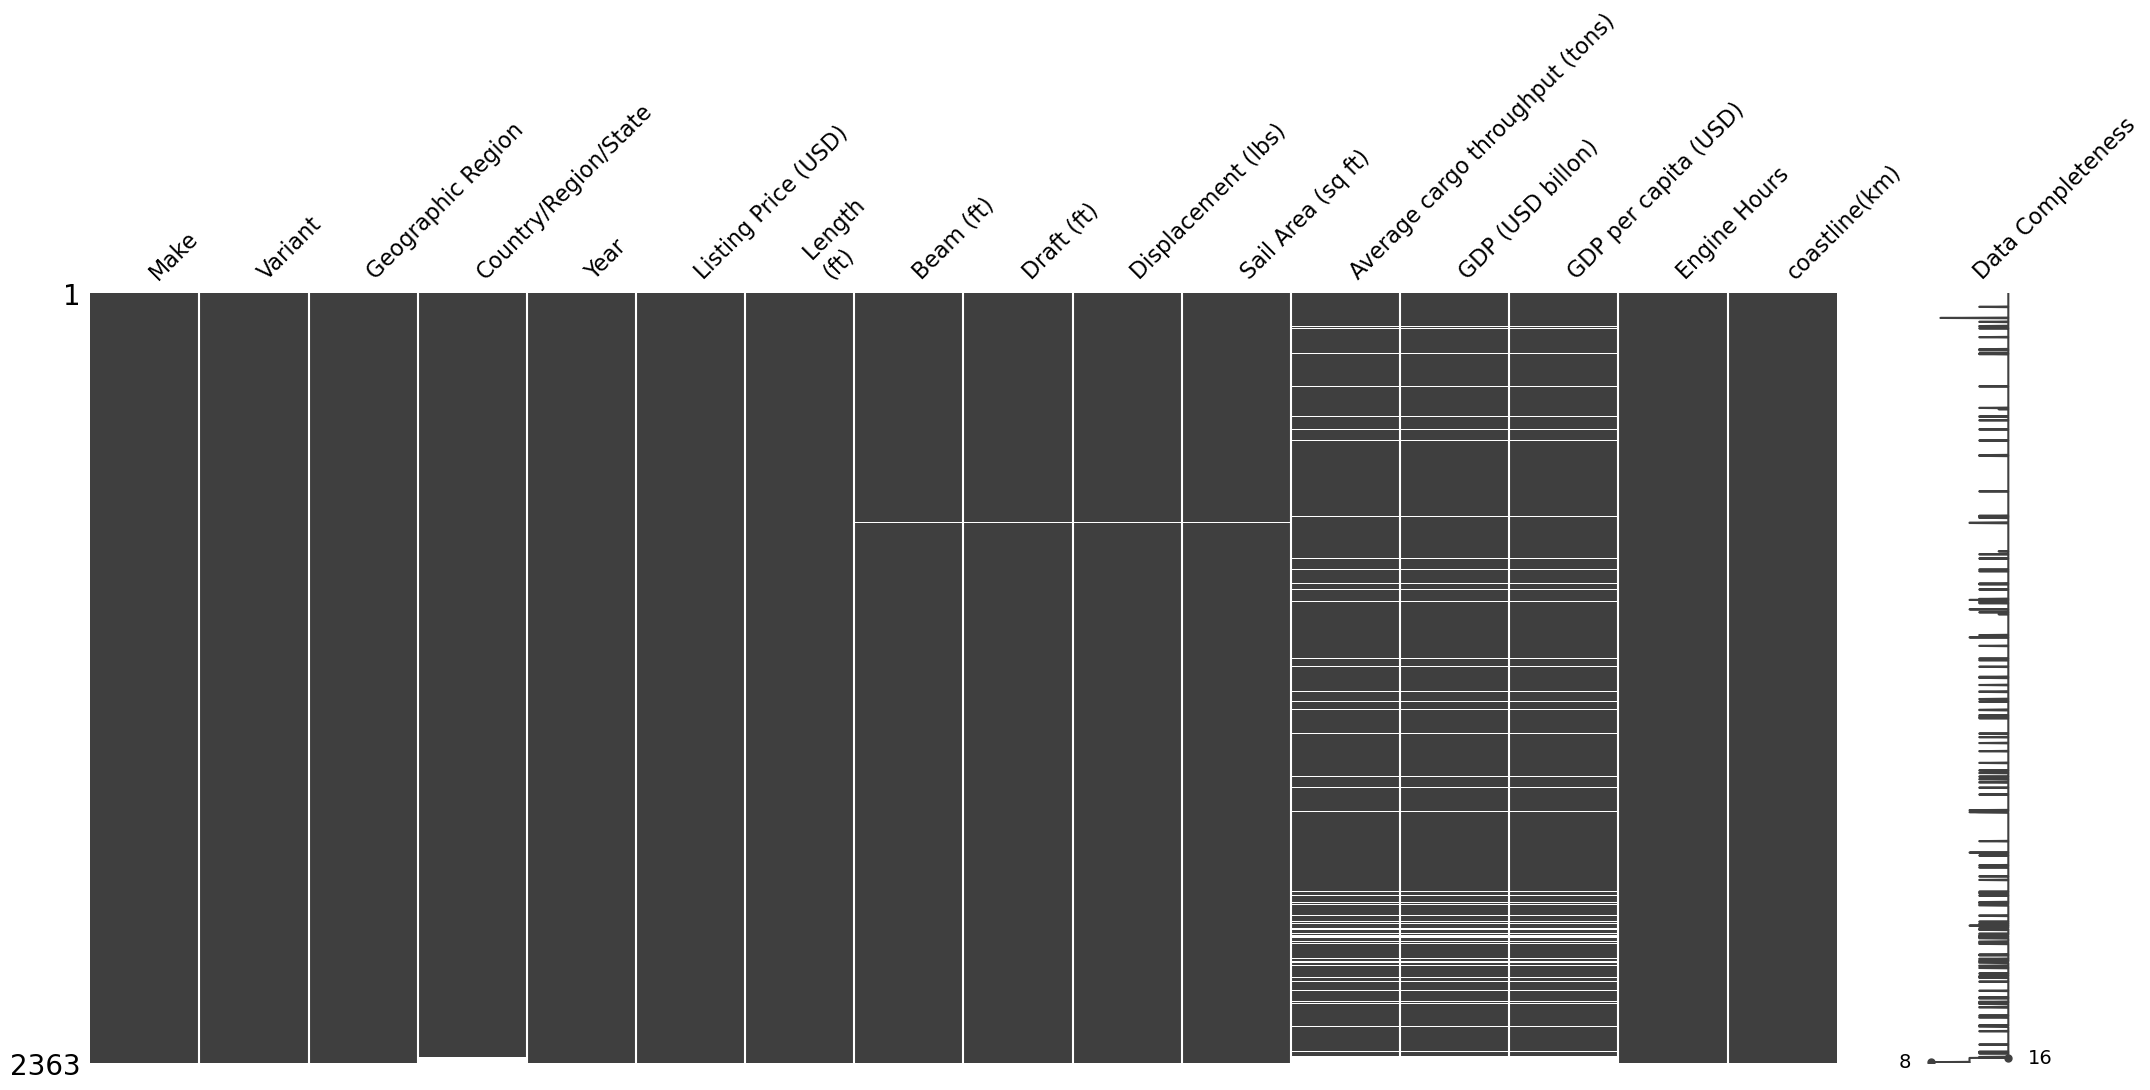

In [5]:
import missingno as msno
msno.matrix(data, labels=True) 

In [6]:
data=data.dropna(axis=0, how='any')

In [7]:
# 查看缺失值数量与比例
(
pd.DataFrame({
        "NaN_num": round(data.isnull().sum(),2),
        "NaN_percent":(data.isnull().sum()/data.shape[0]).apply(lambda x:str(round(x*100,2))+'%') ,
            })
  .sort_values('NaN_num', ascending=False)
)

,NaN_num,NaN_percent
Make,0,0.0%
Variant,0,0.0%
Geographic Region,0,0.0%
Country/Region/State,0,0.0%
Year,0,0.0%
Listing Price (USD),0,0.0%
Length \n(ft),0,0.0%
Beam (ft),0,0.0%
Draft (ft),0,0.0%
Displacement (lbs),0,0.0%


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2186 entries, 0 to 2345
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Make                             2186 non-null   object 
 1   Variant                          2186 non-null   object 
 2   Geographic Region                2186 non-null   object 
 3   Country/Region/State             2186 non-null   object 
 4   Year                             2186 non-null   int64  
 5   Listing Price (USD)              2186 non-null   int64  
 6   Length 
(ft)                     2186 non-null   int64  
 7   Beam (ft)                        2186 non-null   float64
 8   Draft (ft)                       2186 non-null   float64
 9   Displacement (lbs)               2186 non-null   float64
 10  Sail Area (sq ft)                2186 non-null   float64
 11  Average cargo throughput (tons)  2186 non-null   float64
 12  GDP (USD billon)    

In [9]:
data.describe().round(2)

,Year,Listing Price (USD),Length \n(ft),Beam (ft),Draft (ft),Displacement (lbs),Sail Area (sq ft),Average cargo throughput (tons),GDP (USD billon),GDP per capita (USD),Engine Hours,coastline(km)
count,2186.00,2186.00,2186.00,2186.00,2186.00,2186.00,2186.00,2.186000e+03,2186.00,2186.00,2186.00,2186.00
mean,2010.38,226305.17,45.27,13.99,6.78,26476.90,1053.76,3.475422e+07,1061.80,33338.61,9.62,5175.42
std,4.05,144641.80,4.77,1.08,0.87,7956.23,267.99,5.163193e+07,1078.41,20499.77,4.05,4360.76
min,2005.00,45000.00,36.00,9.50,3.94,6393.00,516.00,5.500000e+04,0.80,4871.00,1.00,0.00
25%,2007.00,139000.00,40.25,13.08,6.33,19621.00,861.00,1.850000e+06,57.80,13933.00,6.00,121.00
50%,2009.00,190303.50,45.00,13.94,6.75,25353.00,1032.00,1.970000e+07,650.00,30459.00,11.00,4964.00
75%,2014.00,267054.25,49.00,14.73,7.22,31085.00,1191.00,5.233000e+07,2005.00,44494.00,13.00,7600.00
max,2019.00,1885229.00,56.00,16.73,11.58,63900.00,2314.00,2.952000e+08,3861.00,93944.00,15.00,25148.00


In [10]:
data

,Make,Variant,Geographic Region,Country/Region/State,Year,Listing Price (USD),Length \n(ft),Beam (ft),Draft (ft),Displacement (lbs),Sail Area (sq ft),Average cargo throughput (tons),GDP (USD billon),GDP per capita (USD),Engine Hours,coastline(km)
0,Alubat,Ovni 395,Europe,France,2005,267233,41,12.63,3.94,22046.0,824.0,45350000.0,2939.0,44494.0,15,4853.0
1,Bavaria,38 Cruiser,Europe,Croatia,2005,75178,38,12.99,6.07,15432.0,721.0,595000.0,57.8,13647.0,15,5835.0
2,Bavaria,38 Cruiser,Europe,Croatia,2005,66825,38,12.99,6.07,15432.0,721.0,595000.0,57.8,13647.0,15,5835.0
3,Bavaria,38 Cruiser,Europe,Croatia,2005,54661,38,12.99,6.07,15432.0,721.0,595000.0,57.8,13647.0,15,5835.0
4,Bavaria,38 Cruiser,Europe,Croatia,2005,53447,38,12.99,6.07,15432.0,721.0,595000.0,57.8,13647.0,15,5835.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2339,Hanse,508,Europe,Ireland,2019,352019,50,15.58,7.71,31967.0,1216.0,1610000.0,399.0,80926.0,1,1448.0
2340,Hanse,508,Europe,Croatia,2019,321166,50,15.58,7.71,31967.0,1216.0,595000.0,57.8,13647.0,1,5835.0
2341,Hanse,548,Europe,France,2019,467415,54,16.01,8.40,43430.0,1836.0,45350000.0,2939.0,44494.0,1,4853.0
2342,Hanse,548,Europe,France,2019,464986,54,16.01,8.40,43430.0,1836.0,45350000.0,2939.0,44494.0,1,4853.0


In [11]:
data=data.groupby(['Make','Variant','Length \n(ft)','Geographic Region','Country/Region/State','Year','Beam (ft)','Draft (ft)','Displacement (lbs)','Sail Area (sq ft)','Average cargo throughput (tons)','GDP (USD billon)','GDP per capita (USD)','Engine Hours','coastline(km)'],as_index=False,sort=False)['Listing Price (USD)'].mean()
data


,Make,Variant,Length \n(ft),Geographic Region,Country/Region/State,Year,Beam (ft),Draft (ft),Displacement (lbs),Sail Area (sq ft),Average cargo throughput (tons),GDP (USD billon),GDP per capita (USD),Engine Hours,coastline(km),Listing Price (USD)
0,Alubat,Ovni 395,41,Europe,France,2005,12.63,3.94,22046.0,824.0,45350000.0,2939.0,44494.0,15,4853.0,267233.000000
1,Bavaria,38 Cruiser,38,Europe,Croatia,2005,12.99,6.07,15432.0,721.0,595000.0,57.8,13647.0,15,5835.0,65554.666667
2,Bavaria,38 Cruiser,38,Europe,Croatia,2005,12.99,6.07,15432.0,721.0,595000.0,57.8,13647.0,15,5835.0,53447.000000
3,Bavaria,38 Cruiser,38,Europe,Greece,2005,12.99,6.07,15432.0,721.0,3150000.0,204.0,19147.0,15,13676.0,91101.000000
4,Bavaria,39 Cruiser,39,Europe,Greece,2005,13.02,6.23,19621.0,776.0,3150000.0,204.0,19147.0,15,13676.0,66748.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1834,Hanse,418,41,Europe,Croatia,2019,12.99,6.56,20944.0,914.0,595000.0,57.8,13647.0,1,5835.0,278981.000000
1835,Hanse,508,50,Europe,Ireland,2019,15.58,7.71,31967.0,1216.0,1610000.0,399.0,80926.0,1,1448.0,352019.000000
1836,Hanse,508,50,Europe,Croatia,2019,15.58,7.71,31967.0,1216.0,595000.0,57.8,13647.0,1,5835.0,321166.000000
1837,Hanse,548,54,Europe,France,2019,16.01,8.40,43430.0,1836.0,45350000.0,2939.0,44494.0,1,4853.0,466200.500000


In [12]:
dic_make = {label:idx for idx,label in enumerate(np.unique(data['Make']))}

dic_Variant = {label:idx for idx,label in enumerate(np.unique(list(data['Variant'])))}

for i in list(dic_Variant.keys()):
    if(i.isdigit()):
        dic_Variant[int(i)]=dic_Variant[i]
    else:
        list1=i.split('.')
        flag=1
        for j in list1:
            if not j.isdigit():
                flag=0
        if flag:
            dic_Variant[float(i)]=dic_Variant[i]
        

dic_GR = {label:idx for idx,label in enumerate(np.unique(data['Geographic Region']))}

dic_CRS = {label:idx for idx,label in enumerate(np.unique(data['Country/Region/State']))}

In [25]:
dic_Variant['Sense 43']

302

In [13]:
# data['Make']=data['Make'].map(dic_make)
# data['Variant'] = data['Variant'].map(dic_Variant)
# data['Geographic Region']=data['Geographic Region'].map(dic_GR)
# data['Country/Region/State']=data['Country/Region/State'].map(dic_CRS)


In [14]:
data

,Make,Variant,Length \n(ft),Geographic Region,Country/Region/State,Year,Beam (ft),Draft (ft),Displacement (lbs),Sail Area (sq ft),Average cargo throughput (tons),GDP (USD billon),GDP per capita (USD),Engine Hours,coastline(km),Listing Price (USD)
0,Alubat,Ovni 395,41,Europe,France,2005,12.63,3.94,22046.0,824.0,45350000.0,2939.0,44494.0,15,4853.0,267233.000000
1,Bavaria,38 Cruiser,38,Europe,Croatia,2005,12.99,6.07,15432.0,721.0,595000.0,57.8,13647.0,15,5835.0,65554.666667
2,Bavaria,38 Cruiser,38,Europe,Croatia,2005,12.99,6.07,15432.0,721.0,595000.0,57.8,13647.0,15,5835.0,53447.000000
3,Bavaria,38 Cruiser,38,Europe,Greece,2005,12.99,6.07,15432.0,721.0,3150000.0,204.0,19147.0,15,13676.0,91101.000000
4,Bavaria,39 Cruiser,39,Europe,Greece,2005,13.02,6.23,19621.0,776.0,3150000.0,204.0,19147.0,15,13676.0,66748.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1834,Hanse,418,41,Europe,Croatia,2019,12.99,6.56,20944.0,914.0,595000.0,57.8,13647.0,1,5835.0,278981.000000
1835,Hanse,508,50,Europe,Ireland,2019,15.58,7.71,31967.0,1216.0,1610000.0,399.0,80926.0,1,1448.0,352019.000000
1836,Hanse,508,50,Europe,Croatia,2019,15.58,7.71,31967.0,1216.0,595000.0,57.8,13647.0,1,5835.0,321166.000000
1837,Hanse,548,54,Europe,France,2019,16.01,8.40,43430.0,1836.0,45350000.0,2939.0,44494.0,1,4853.0,466200.500000


In [15]:
data.to_excel('Monohulled_coastline_avg_Numerical.xlsx')